In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report as cr, confusion_matrix as cm, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_original = pd.read_csv("../Base.csv")
df_original.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [3]:
df_resampled = pd.read_csv("df_resampled.csv")
df_resampled.tail()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,fraud_bool
117635,0.167342,0.128287,-1,140,36,0.013914,-1.188628,2,902,457.323809,...,1500.000000,0,0,7.304120,2,0,1,0,6,1
117636,0.235304,0.217058,-1,114,57,0.015453,-1.126396,1,1017,6748.501279,...,200.000000,0,0,5.846984,3,0,1,0,3,1
117637,0.844097,0.828784,115,12,20,0.013102,-1.097848,1,719,765.831924,...,200.000000,0,0,7.341642,3,0,1,0,6,1
117638,0.490177,0.134184,-1,50,28,0.015163,-1.656712,2,1904,5442.114657,...,200.000000,0,0,4.556018,2,0,1,0,5,1
117639,0.672238,0.488240,-1,72,22,0.012055,-1.174175,1,654,8285.322091,...,283.286916,0,0,3.951850,3,0,1,0,6,1


In [4]:
X_test = df_original.drop("fraud_bool", axis=1)
y_test = df_original["fraud_bool"]
print(X_test.head())
print(y_test.head())

   income  name_email_similarity  prev_address_months_count  \
0     0.3               0.986506                         -1   
1     0.8               0.617426                         -1   
2     0.8               0.996707                          9   
3     0.6               0.475100                         11   
4     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w   velocity_6h  ...  \
0              102.453711           AA          1059  13096.035018  ...   
1               -0.849551           AD          1658   9

In [5]:
X_train = df_resampled.drop(columns=["fraud_bool"])
y_train = df_resampled["fraud_bool"]
print(X_train.head())
print(y_train.head())

   income  name_email_similarity  prev_address_months_count  \
0     0.1               0.019742                         59   
1     0.9               0.185549                         -1   
2     0.2               0.802497                         -1   
3     0.4               0.268557                         20   
4     0.9               0.523754                         91   

   current_address_months_count  customer_age  days_since_request  \
0                            67            20            1.545615   
1                           135            30            0.012995   
2                           362            20            0.013370   
3                            15            30            0.032347   
4                            28            50            0.048115   

   intended_balcon_amount  payment_type  zip_count_4w  velocity_6h  ...  \
0                6.892693             0          1625  6060.121833  ...   
1               -0.620119             1           887  4

In [6]:
rf_model = RandomForestClassifier(
    n_estimators=200,    # number of trees
    max_depth=None,      # let trees grow fully
    random_state=42,
    n_jobs=-1
)

In [7]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [8]:
X_test_encoded = X_test.copy()
object_cols = X_test_encoded.select_dtypes(include=['object']).columns.tolist()
for col in object_cols:
    X_test_encoded[col] = X_test_encoded[col].astype('category').cat.codes


In [9]:
y_prob_rf = rf_model.predict_proba(X_test_encoded)[:, 1]
y_pred_rf = (y_prob_rf >= 0.3).astype(int)

In [10]:
print("\n=== RANDOM FOREST CLASSIFICATION REPORT (Threshold = 0.3) ===")
print(cr(y_test, y_pred_rf))


=== RANDOM FOREST CLASSIFICATION REPORT (Threshold = 0.3) ===
              precision    recall  f1-score   support

           0       1.00      0.85      0.92    988971
           1       0.07      0.95      0.12     11029

    accuracy                           0.85   1000000
   macro avg       0.53      0.90      0.52   1000000
weighted avg       0.99      0.85      0.91   1000000



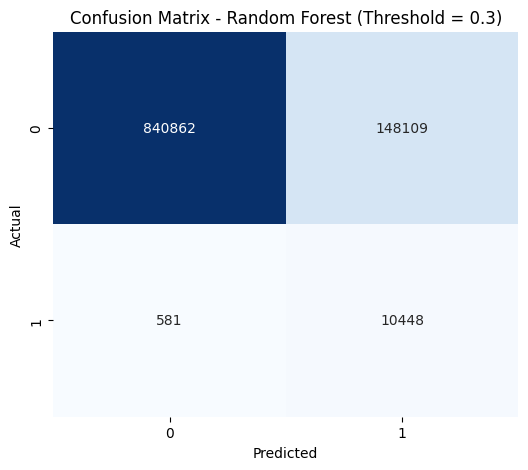

In [11]:
cmatrix_rf = cm(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cmatrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Random Forest (Threshold = 0.3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"\n=== ROC-AUC SCORE ===\n{roc_auc_rf:.4f}")


=== ROC-AUC SCORE ===
0.9668
